***
<br>
<h1>WORLD BANK DATA - SOUTH AMERICA (IRONHIDE) REGION ANALYSIS</h1><br><br>
The analysis is divided into four parts:<br>
<strong>(1.1) Detecting missing values<br>
(1.2) Imputing the missing values<br>
(1.3) Detecting outliers<br>
(1.4) Creating plots to explain the data</strong><br><br>
The data for imputing the missing values is gathered from <a href="https://data.worldbank.org/">https://data.worldbank.org/</a> <br><br>
This project is a combined work of <strong><em>TEAM 2</em></strong> comprising of:<br>
1. Arseniy<br>
2. Brian<br>
3. Carlos<br>
4. Johan<br>
5. Pat<br>
6. Qinyi<br><br>
***
***
***

## Detecting missing values










In [1]:
# Importing the pandas package as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Saving the file into a variable for easy access
world_file = 'WDIW Dataset.xlsx'

# Reading the file into Python
world = pd.read_excel(world_file)

world

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.700000,97.091973,99.500000,68.957000,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750000,52.655431,6.528600e+05,9.250468,25.250000,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,19.642000,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617000,47.965907,2.875000e+04,18.879748,59.383000,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.000000,100.000000,100.000000,10.071000,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948000,45.615016,2.381740e+06,NaN,72.052000,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830000,NaN,2.000000e+02,NaN,87.170000,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850000,79.285586,4.700000e+02,NaN,88.150000,-0.495265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PSE,West Bank,Arabian Peninsula,Wheeljack,100.000000,100.000000,100.000000,52.766000,73.481011,5.367632,...,NaN,NaN,NaN,NaN,24.106000,NaN,6.020000e+03,6.386103,75.894000,2.339809
213,WLD,World,World,Sentinel Prime,88.848638,78.647356,97.357692,42.455699,54.216831,13.216044,...,NaN,0.8,10.8,13.5,45.177758,65.035716,1.320366e+08,15.204328,54.822242,1.985135
214,YEM,Yemen,Arabian Peninsula,Wheeljack,79.200000,68.702845,97.848656,60.352000,74.987414,4.990006,...,NaN,0.1,38.9,NaN,63.984000,19.112768,5.279700e+05,NaN,36.016000,4.166123
215,ZMB,Zambia,East/South Africa,Jazz,40.300000,13.997701,75.200000,120.112000,90.462311,3.970773,...,NaN,11.6,46.7,NaN,57.024000,52.093837,7.526100e+05,15.184871,42.976000,4.211349


In [2]:
# Printing first 5 rows of the dataset
print(world.head())

  Country Code    Country Name                  Hult Region        Cool Name  \
0          AFG     Afghanistan         Middle East & Russia           Mirage   
1          ALB         Albania               Eastern Europe  Skids & Mudflap   
2          DZA         Algeria  Northern Sub-Saharan Africa        Bumblebee   
3          ASM  American Samoa          Australia & Oceania      Cliffhanger   
4          AND         Andorra               Eastern Europe  Skids & Mudflap   

   Access to electricity (% of population)  \
0                                     97.7   
1                                    100.0   
2                                    100.0   
3                                      NaN   
4                                    100.0   

   Access to electricity, rural (% of rural population)  \
0                                          97.091973      
1                                         100.000000      
2                                         100.000000      
3     

In [3]:
# Printing the columns of the dataset
print(world.columns)

Index(['Country Code', 'Country Name', 'Hult Region', 'Cool Name',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Armed forces personnel (% of total labor force)',
       'Birth rate, crude (per 1,000 people)',
       'Births attended by skilled health staff (% of total)',
       'Death rate, crude (per 1,000 people)',
       'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)',
 

In [4]:
# Printing info related to each column
print(world.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 67 columns):
Country Code                                                                                                  217 non-null object
Country Name                                                                                                  217 non-null object
Hult Region                                                                                                   217 non-null object
Cool Name                                                                                                     217 non-null object
Access to electricity (% of population)                                                                       216 non-null float64
Access to electricity, rural (% of rural population)                                                          211 non-null float64
Access to electricity, urban (% of urban population)                                                          216

In [5]:
# Printing discriptive statistic for each column
print(world.describe())

       Access to electricity (% of population)  \
count                               216.000000   
mean                                 85.649028   
std                                  24.729305   
min                                   9.300000   
25%                                  80.662701   
50%                                 100.000000   
75%                                 100.000000   
max                                 100.000000   

       Access to electricity, rural (% of rural population)  \
count                                         211.000000      
mean                                           81.067825      
std                                            31.664691      
min                                             1.658409      
25%                                            71.868009      
50%                                           100.000000      
75%                                           100.000000      
max                                          

In [6]:
world.isnull().sum().sort_values(ascending = False).head(n  = 40)

Prevalence of underweight, weight for age (% of children under 5)                                          216
Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                     214
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)            212
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)          211
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           211
Births attended by skilled health staff (% of total)                                                       210
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         210
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)          210
Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)    210
E

In [7]:
# Subsetting to only the Ironhide data
world_ironhide = world.loc[:, :][world['Cool Name'] == 'Ironhide']

# Changing the column headers to lowercase
world_ironhide.columns = world_ironhide.columns.str.lower()

# Replacing the white space in column headers with underscore
world_ironhide.columns = world_ironhide.columns.str.replace(' ', '_')

# Saving the Ironhide data to excel file
world_ironhide.to_excel('world_ironhide.xlsx', index = False)

world_ironhide

,country_code,country_name,hult_region,cool_name,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)",...,poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"prevalence_of_hiv,_total_(%_of_population_ages_15-49)",prevalence_of_undernourishment_(%_of_population),"prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)",rural_population_(%_of_total_population),"services,_value_added_(%_of_gdp)",surface_area_(sq._km),tax_revenue_(%_of_gdp),urban_population_(%_of_total_population),urban_population_growth_(annual_%)
7,ARG,Argentina,South America,Ironhide,100.000000,100.000000,100.000000,62.782,56.046355,17.149038,...,25.7,0.4,4.6,NaN,8.251,56.967795,2.780400e+06,10.955501,91.749,1.170196
23,BOL,Bolivia,South America,Ironhide,91.800000,74.820442,99.400000,64.900,62.814740,11.471730,...,36.4,0.3,17.1,NaN,30.920,48.737852,1.098580e+06,NaN,69.080,1.945544
26,BRA,Brazil,South America,Ironhide,100.000000,100.000000,100.000000,59.111,43.450061,12.344584,...,26.5,0.5,2.5,NaN,13.691,63.081835,8.515770e+06,12.704740,86.309,1.116980
39,CHL,Chile,South America,Ironhide,100.000000,100.000000,100.000000,41.052,45.382839,16.271094,...,8.6,0.5,2.7,NaN,12.510,57.887926,7.567000e+05,17.418720,87.490,1.502941
41,COL,Colombia,South America,Ironhide,99.595238,97.930028,100.000000,66.651,46.533031,12.014374,...,26.9,0.4,4.8,NaN,19.554,57.594920,1.141749e+06,15.194617,80.446,1.924431
49,CUW,Curacao,South America,Ironhide,100.000000,100.000000,100.000000,27.942,55.024535,25.136707,...,NaN,NaN,NaN,NaN,10.797,71.688004,4.440000e+02,NaN,89.203,0.242453
57,ECU,Ecuador,South America,Ironhide,100.000000,100.000000,100.000000,79.261,54.589947,10.745764,...,21.5,0.4,7.9,NaN,36.330,51.231127,2.563700e+05,NaN,63.670,1.982365
83,GUY,Guyana,South America,Ironhide,90.864876,88.757962,96.697205,74.382,53.333004,9.517584,...,NaN,1.5,8.1,NaN,73.462,42.015392,2.149700e+05,NaN,26.538,0.709757
153,PRY,Paraguay,South America,Ironhide,99.300000,98.508010,99.800000,70.504,56.116710,9.743259,...,26.4,0.5,10.7,NaN,38.700,47.877093,4.067520e+05,9.953470,61.300,1.755305
154,PER,Peru,South America,Ironhide,96.362991,83.675904,100.000000,56.882,51.914041,11.865706,...,21.7,0.3,9.7,NaN,22.280,54.068413,1.285220e+06,13.203502,77.720,1.895094


In [8]:
# Printing the columns of the dataset
print(world_ironhide.columns)

Index(['country_code', 'country_name', 'hult_region', 'cool_name',
       'access_to_electricity_(%_of_population)',
       'access_to_electricity,_rural_(%_of_rural_population)',
       'access_to_electricity,_urban_(%_of_urban_population)',
       'adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)',
       'age_dependency_ratio_(%_of_working-age_population)',
       'age_dependency_ratio,_old_(%_of_working-age_population)',
       'age_dependency_ratio,_young_(%_of_working-age_population)',
       'agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)',
       'armed_forces_personnel_(%_of_total_labor_force)',
       'birth_rate,_crude_(per_1,000_people)',
       'births_attended_by_skilled_health_staff_(%_of_total)',
       'death_rate,_crude_(per_1,000_people)',
       'educational_attainment,_doctoral_or_equivalent,_population_25+,_total_(%)_(cumulative)',
       'educational_attainment,_at_least_bachelor's_or_equivalent,_population_25+,_total_(%)_(cumulative)',
 

In [9]:
# Printing info related to each column
print(world_ironhide.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 7 to 209
Data columns (total 67 columns):
country_code                                                                                                  13 non-null object
country_name                                                                                                  13 non-null object
hult_region                                                                                                   13 non-null object
cool_name                                                                                                     13 non-null object
access_to_electricity_(%_of_population)                                                                       13 non-null float64
access_to_electricity,_rural_(%_of_rural_population)                                                          13 non-null float64
access_to_electricity,_urban_(%_of_urban_population)                                                          13 non-nul

In [10]:
# Printing discriptive statistic for each column
print(world_ironhide.describe())

       access_to_electricity_(%_of_population)  \
count                                13.000000   
mean                                 98.054327   
std                                   3.236600   
min                                  90.864876   
25%                                  96.783142   
50%                                 100.000000   
75%                                 100.000000   
max                                 100.000000   

       access_to_electricity,_rural_(%_of_rural_population)  \
count                                          13.000000      
mean                                           94.973695      
std                                             8.096144      
min                                            74.820442      
25%                                            90.965696      
50%                                           100.000000      
75%                                           100.000000      
max                                          

In [11]:
# Checking columns with Null values
world_ironhide.isnull().any()

country_code                                False
country_name                                False
hult_region                                 False
cool_name                                   False
access_to_electricity_(%_of_population)     False
                                            ...  
services,_value_added_(%_of_gdp)             True
surface_area_(sq._km)                       False
tax_revenue_(%_of_gdp)                       True
urban_population_(%_of_total_population)    False
urban_population_growth_(annual_%)          False
Length: 67, dtype: bool

In [12]:
# Finding the number of null values in each column, arranging them in descending order and displaying the first 40 values 
world_ironhide.isnull().sum().sort_values(ascending = False).head(n  = 40)


educational_attainment,_doctoral_or_equivalent,_population_25+,_total_(%)_(cumulative)                     13
prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)                                          13
births_attended_by_skilled_health_staff_(%_of_total)                                                       13
educational_attainment,_at_least_bachelor's_or_equivalent,_population_25+,_total_(%)_(cumulative)          12
educational_attainment,_at_least_completed_upper_secondary,_population_25+,_total_(%)_(cumulative)         12
educational_attainment,_at_least_completed_short-cycle_tertiary,_population_25+,_total_(%)_(cumulative)    12
educational_attainment,_at_least_master's_or_equivalent,_population_25+,_total_(%)_(cumulative)            12
educational_attainment,_at_least_completed_primary,_population_25+_years,_total_(%)_(cumulative)           12
educational_attainment,_at_least_completed_post-secondary,_population_25+,_total_(%)_(cumulative)          12
educationa

In [13]:
# Finding the number of missing values in each row (by country) to see which country has the most missing values.
world_ironhide.isnull().sum(axis = 1)

7      13
23     14
26     13
39     13
41     12
49     31
57     14
83     23
153    13
154    10
186    25
206     4
209    30
dtype: int64

In [14]:
# Reading the exported ironhide file

world_ironhide_file = 'world_ironhide.xlsx'

world_ironhide = pd.read_excel(world_ironhide_file)

world_ironhide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 67 columns):
country_code                                                                                                  13 non-null object
country_name                                                                                                  13 non-null object
hult_region                                                                                                   13 non-null object
cool_name                                                                                                     13 non-null object
access_to_electricity_(%_of_population)                                                                       13 non-null float64
access_to_electricity,_rural_(%_of_rural_population)                                                          13 non-null float64
access_to_electricity,_urban_(%_of_urban_population)                                                          13 non-null

### Flagging the missing values

In [15]:
# Creating a loop to flag null values

for col in world_ironhide:
    
    if world_ironhide[col].isnull().astype(int).sum() > 0:
        world_ironhide['m_'+col] = world_ironhide[col].isnull().astype(int)
        
world_ironhide

,country_code,country_name,hult_region,cool_name,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)",...,m_military_expenditure_(%_of_gdp),m_population_in_the_largest_city_(%_of_urban_population),m_poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"m_prevalence_of_hiv,_total_(%_of_population_ages_15-49)",m_prevalence_of_undernourishment_(%_of_population),"m_prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)","m_services,_value_added_(%_of_gdp)",m_tax_revenue_(%_of_gdp)
0,ARG,Argentina,South America,Ironhide,100.000000,100.000000,100.000000,62.782,56.046355,17.149038,...,0,0,0,0,0,0,0,1,0,0
1,BOL,Bolivia,South America,Ironhide,91.800000,74.820442,99.400000,64.900,62.814740,11.471730,...,0,0,0,0,0,0,0,1,0,1
2,BRA,Brazil,South America,Ironhide,100.000000,100.000000,100.000000,59.111,43.450061,12.344584,...,0,0,0,0,0,0,0,1,0,0
3,CHL,Chile,South America,Ironhide,100.000000,100.000000,100.000000,41.052,45.382839,16.271094,...,0,0,0,0,0,0,0,1,0,0
4,COL,Colombia,South America,Ironhide,99.595238,97.930028,100.000000,66.651,46.533031,12.014374,...,0,0,0,0,0,0,0,1,0,0
5,CUW,Curacao,South America,Ironhide,100.000000,100.000000,100.000000,27.942,55.024535,25.136707,...,1,1,1,1,1,1,1,1,0,1
6,ECU,Ecuador,South America,Ironhide,100.000000,100.000000,100.000000,79.261,54.589947,10.745764,...,0,0,0,0,0,0,0,1,0,1
7,GUY,Guyana,South America,Ironhide,90.864876,88.757962,96.697205,74.382,53.333004,9.517584,...,0,1,1,1,1,0,0,1,0,1
8,PRY,Paraguay,South America,Ironhide,99.300000,98.508010,99.800000,70.504,56.116710,9.743259,...,0,0,0,0,0,0,0,1,0,0
9,PER,Peru,South America,Ironhide,96.362991,83.675904,100.000000,56.882,51.914041,11.865706,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Cross checking to see if all null values were accounted for
a = world_ironhide.isnull().sum().sum()
b = world_ironhide.iloc[ : , -37: ].sum().sum()

if a == b:
    print('\nAll missing values accounted for.')
else:
    print('\nSome missing values may be unaccounted for, please audit.')


All missing values accounted for.


## Imputing missing values <br>
While imputing the missing values we ensured that the <strong>natural distribution of the original dataset was distorted the least</strong>. We used the techniques of <em>imputing with mean, median and external sources</em> after visually analyzing each distribution to help determine which strategy fits the original dataset the best.  
### Imputing with Mean and Median

In [17]:
# the following code makes the new DataFrame independent
df_dropped = pd.DataFrame.copy(world_ironhide)

# Creating a list with 6 and more missing values
columns = ['educational_attainment,_doctoral_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)', 'births_attended_by_skilled_health_staff_(%_of_total)', 'educational_attainment,_at_least_bachelor\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_upper_secondary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_short-cycle_tertiary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_master\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_primary,_population_25+_years,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_post-secondary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_lower_secondary,_population_25+,_total_(%)_(cumulative)', 'literacy_rate,_adult_total_(%_of_people_ages_15_and_above)', 'literacy_rate,_youth_total_(%_of_people_ages_15-24)', 'government_expenditure_on_education,_total_(%_of_government_expenditure)', 'tax_revenue_(%_of_gdp)']
df_dropped.drop(columns, inplace = True, axis = 1) # Dropping the columns that have 6 and more missing values as imputing with mean or median will not work in this case.

# Deleting the rows with empty values
df_dropped = df_dropped.dropna().round(2)

# checking to see if all missing values have been dropped
print(df_dropped.isnull().sum().sum())

df_dropped

0


,country_code,country_name,hult_region,cool_name,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)",...,m_military_expenditure_(%_of_gdp),m_population_in_the_largest_city_(%_of_urban_population),m_poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"m_prevalence_of_hiv,_total_(%_of_population_ages_15-49)",m_prevalence_of_undernourishment_(%_of_population),"m_prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)","m_services,_value_added_(%_of_gdp)",m_tax_revenue_(%_of_gdp)
0,ARG,Argentina,South America,Ironhide,100.00,100.00,100.0,62.78,56.05,17.15,...,0,0,0,0,0,0,0,1,0,0
1,BOL,Bolivia,South America,Ironhide,91.80,74.82,99.4,64.90,62.81,11.47,...,0,0,0,0,0,0,0,1,0,1
2,BRA,Brazil,South America,Ironhide,100.00,100.00,100.0,59.11,43.45,12.34,...,0,0,0,0,0,0,0,1,0,0
3,CHL,Chile,South America,Ironhide,100.00,100.00,100.0,41.05,45.38,16.27,...,0,0,0,0,0,0,0,1,0,0
4,COL,Colombia,South America,Ironhide,99.60,97.93,100.0,66.65,46.53,12.01,...,0,0,0,0,0,0,0,1,0,0
6,ECU,Ecuador,South America,Ironhide,100.00,100.00,100.0,79.26,54.59,10.75,...,0,0,0,0,0,0,0,1,0,1
8,PRY,Paraguay,South America,Ironhide,99.30,98.51,99.8,70.50,56.12,9.74,...,0,0,0,0,0,0,0,1,0,0
9,PER,Peru,South America,Ironhide,96.36,83.68,100.0,56.88,51.91,11.87,...,0,0,0,0,0,0,0,1,0,0
11,URY,Uruguay,South America,Ironhide,100.00,100.00,100.0,58.73,54.98,22.78,...,0,0,0,0,0,0,0,1,0,0


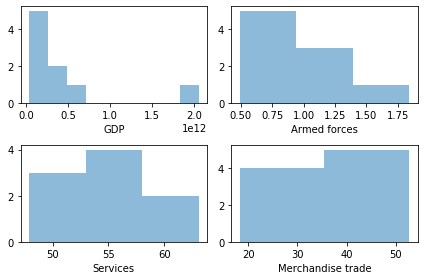

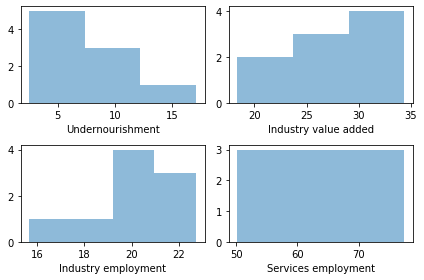

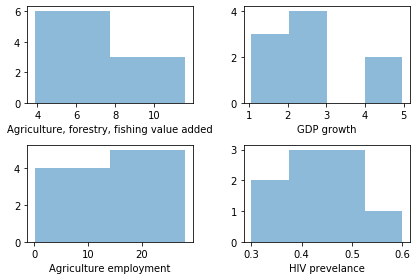

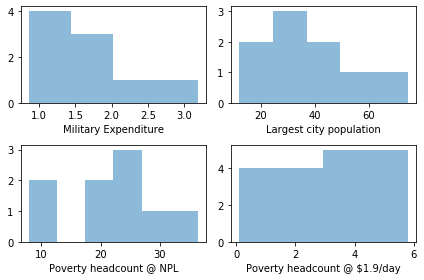

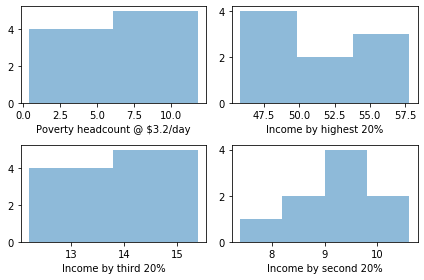

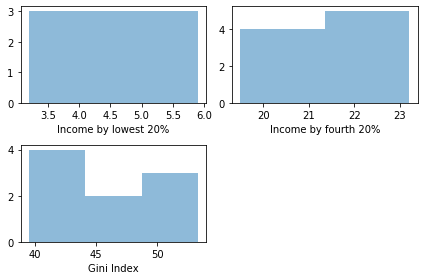

In [18]:
# BEFORE IMPUTATION

# Plotting results using subplots of the columns with less than 6 missing values
 
plt.subplot(2, 2, 1) # Activating the top left plot
plt.hist(x     = 'gdp_(current_us$)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5) # Adding transparency in color

plt.xlabel('GDP')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'armed_forces_personnel_(%_of_total_labor_force)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Armed forces')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'services,_value_added_(%_of_gdp)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Services')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'merchandise_trade_(%_of_gdp)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Merchandise trade')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'prevalence_of_undernourishment_(%_of_population)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Undernourishment')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'industry_(including_construction),_value_added_(%_of_gdp)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Industry value added')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Industry employment')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Services employment')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Agriculture, forestry, fishing value added')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'gdp_growth_(annual_%)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('GDP growth')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Agriculture employment')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'prevalence_of_hiv,_total_(%_of_population_ages_15-49)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('HIV prevelance')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'military_expenditure_(%_of_gdp)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)
         
plt.xlabel('Military Expenditure')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'population_in_the_largest_city_(%_of_urban_population)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Largest city population')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Poverty headcount @ NPL')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Poverty headcount @ $1.9/day')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Poverty headcount @ $3.2/day')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'income_share_held_by_highest_20%', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Income by highest 20%')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'income_share_held_by_third_20%', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Income by third 20%')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'income_share_held_by_second_20%', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Income by second 20%')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'income_share_held_by_lowest_20%', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Income by lowest 20%')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'income_share_held_by_fourth_20%', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Income by fourth 20%')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'gini_index_(world_bank_estimate)', 
         data  = df_dropped,
         bins  = 'fd',
         alpha = 0.5)

plt.xlabel('Gini Index')

# saving the results to the working directory with savefig()
plt.savefig('Histograms BEFORE Imputation.jpg')

plt.tight_layout()

plt.show()

In [19]:
# Soft coding measure of centres
a_median = world_ironhide['gdp_(current_us$)'].median()
b_median = world_ironhide['armed_forces_personnel_(%_of_total_labor_force)'].median()
c_median = world_ironhide['services,_value_added_(%_of_gdp)'].median()
d_median = world_ironhide['merchandise_trade_(%_of_gdp)'].median()
e_median = world_ironhide['prevalence_of_undernourishment_(%_of_population)'].median()
f_median = world_ironhide['industry_(including_construction),_value_added_(%_of_gdp)'].median()
g_median = world_ironhide['employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)'].median()
h_median = world_ironhide['employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)'].median()
i_median = world_ironhide['agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)'].median()
j_median = world_ironhide['gdp_growth_(annual_%)'].median()
k_median = world_ironhide['employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)'].median()
l_median = world_ironhide['prevalence_of_hiv,_total_(%_of_population_ages_15-49)'].median()
m_median = world_ironhide['military_expenditure_(%_of_gdp)'].median()
n_median = world_ironhide['population_in_the_largest_city_(%_of_urban_population)'].median()
o_median = world_ironhide['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'].median()
p_median = world_ironhide['poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)'].median()
q_median = world_ironhide['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)'].median()
r_median = world_ironhide['income_share_held_by_highest_20%'].median()
s_median = world_ironhide['income_share_held_by_third_20%'].median()
t_median = world_ironhide['income_share_held_by_second_20%'].median()
u_median = world_ironhide['income_share_held_by_lowest_20%'].median()
v_mean   = world_ironhide['income_share_held_by_fourth_20%'].mean()
w_median = world_ironhide['gini_index_(world_bank_estimate)'].median()


# Filling NA's with respective measure of centres for columns having less than 6 missing values.
world_ironhide['gdp_(current_us$)']                                                        = world_ironhide['gdp_(current_us$)'].fillna(a_median).round(2)
world_ironhide['armed_forces_personnel_(%_of_total_labor_force)']                          = world_ironhide['armed_forces_personnel_(%_of_total_labor_force)'].fillna(b_median).round(2)
world_ironhide['services,_value_added_(%_of_gdp)']                                         = world_ironhide['services,_value_added_(%_of_gdp)'].fillna(c_median).round(2)
world_ironhide['merchandise_trade_(%_of_gdp)']                                             = world_ironhide['merchandise_trade_(%_of_gdp)'].fillna(d_median).round(2)
world_ironhide['prevalence_of_undernourishment_(%_of_population)']                         = world_ironhide['prevalence_of_undernourishment_(%_of_population)'].fillna(e_median).round(2)
world_ironhide['industry_(including_construction),_value_added_(%_of_gdp)']                = world_ironhide['industry_(including_construction),_value_added_(%_of_gdp)'].fillna(f_median).round(2)
world_ironhide['employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)']    = world_ironhide['employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)'].fillna(g_median).round(2)
world_ironhide['employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)']    = world_ironhide['employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)'].fillna(h_median).round(2)
world_ironhide['agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)']               = world_ironhide['agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)'].fillna(i_median).round(2)
world_ironhide['gdp_growth_(annual_%)']                                                    = world_ironhide['gdp_growth_(annual_%)'].fillna(j_median).round(2)
world_ironhide['employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)'] = world_ironhide['employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)'].fillna(k_median).round(2)
world_ironhide['prevalence_of_hiv,_total_(%_of_population_ages_15-49)']                    = world_ironhide['prevalence_of_hiv,_total_(%_of_population_ages_15-49)'].fillna(l_median).round(2)
world_ironhide['military_expenditure_(%_of_gdp)']                                          = world_ironhide['military_expenditure_(%_of_gdp)'].fillna(m_median).round(2)
world_ironhide['population_in_the_largest_city_(%_of_urban_population)']                   = world_ironhide['population_in_the_largest_city_(%_of_urban_population)'].fillna(n_median).round(2)
world_ironhide['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)']      = world_ironhide['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'].fillna(o_median).round(2)
world_ironhide['poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)']      = world_ironhide['poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)'].fillna(p_median).round(2)
world_ironhide['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)']      = world_ironhide['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)'].fillna(q_median).round(2)
world_ironhide['income_share_held_by_highest_20%']                                         = world_ironhide['income_share_held_by_highest_20%'].fillna(r_median).round(2)
world_ironhide['income_share_held_by_third_20%']                                           = world_ironhide['income_share_held_by_third_20%'].fillna(s_median).round(2)
world_ironhide['income_share_held_by_second_20%']                                          = world_ironhide['income_share_held_by_second_20%'].fillna(t_median).round(2)
world_ironhide['income_share_held_by_lowest_20%']                                          = world_ironhide['income_share_held_by_lowest_20%'].fillna(u_median).round(2)
world_ironhide['income_share_held_by_fourth_20%']                                          = world_ironhide['income_share_held_by_fourth_20%'].fillna(v_mean).round(2)
world_ironhide['gini_index_(world_bank_estimate)']                                         = world_ironhide['gini_index_(world_bank_estimate)'].fillna(w_median).round(2)


# Checking to ensure NA's are filled in
print(world_ironhide['gdp_(current_us$)'].isnull().any())
print(world_ironhide['armed_forces_personnel_(%_of_total_labor_force)'].isnull().any())
print(world_ironhide['services,_value_added_(%_of_gdp)'].isnull().any())
print(world_ironhide['merchandise_trade_(%_of_gdp)'].isnull().any())
print(world_ironhide['prevalence_of_undernourishment_(%_of_population)'].isnull().any())
print(world_ironhide['industry_(including_construction),_value_added_(%_of_gdp)'].isnull().any())
print(world_ironhide['employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)'].isnull().any())
print(world_ironhide['employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)'].isnull().any())
print(world_ironhide['agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)'].isnull().any())
print(world_ironhide['gdp_growth_(annual_%)'].isnull().any())
print(world_ironhide['employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)'].isnull().any())
print(world_ironhide['prevalence_of_hiv,_total_(%_of_population_ages_15-49)'].isnull().any())
print(world_ironhide['military_expenditure_(%_of_gdp)'].isnull().any())
print(world_ironhide['population_in_the_largest_city_(%_of_urban_population)'].isnull().any())
print(world_ironhide['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'].isnull().any())
print(world_ironhide['poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)'].isnull().any())
print(world_ironhide['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)'].isnull().any())
print(world_ironhide['income_share_held_by_highest_20%'].isnull().any())
print(world_ironhide['income_share_held_by_third_20%'].isnull().any())
print(world_ironhide['income_share_held_by_second_20%'].isnull().any())
print(world_ironhide['income_share_held_by_lowest_20%'].isnull().any())
print(world_ironhide['income_share_held_by_fourth_20%'].isnull().any())
print(world_ironhide['gini_index_(world_bank_estimate)'].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [20]:
world_ironhide


,country_code,country_name,hult_region,cool_name,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)",...,m_military_expenditure_(%_of_gdp),m_population_in_the_largest_city_(%_of_urban_population),m_poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"m_prevalence_of_hiv,_total_(%_of_population_ages_15-49)",m_prevalence_of_undernourishment_(%_of_population),"m_prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)","m_services,_value_added_(%_of_gdp)",m_tax_revenue_(%_of_gdp)
0,ARG,Argentina,South America,Ironhide,100.000000,100.000000,100.000000,62.782,56.046355,17.149038,...,0,0,0,0,0,0,0,1,0,0
1,BOL,Bolivia,South America,Ironhide,91.800000,74.820442,99.400000,64.900,62.814740,11.471730,...,0,0,0,0,0,0,0,1,0,1
2,BRA,Brazil,South America,Ironhide,100.000000,100.000000,100.000000,59.111,43.450061,12.344584,...,0,0,0,0,0,0,0,1,0,0
3,CHL,Chile,South America,Ironhide,100.000000,100.000000,100.000000,41.052,45.382839,16.271094,...,0,0,0,0,0,0,0,1,0,0
4,COL,Colombia,South America,Ironhide,99.595238,97.930028,100.000000,66.651,46.533031,12.014374,...,0,0,0,0,0,0,0,1,0,0
5,CUW,Curacao,South America,Ironhide,100.000000,100.000000,100.000000,27.942,55.024535,25.136707,...,1,1,1,1,1,1,1,1,0,1
6,ECU,Ecuador,South America,Ironhide,100.000000,100.000000,100.000000,79.261,54.589947,10.745764,...,0,0,0,0,0,0,0,1,0,1
7,GUY,Guyana,South America,Ironhide,90.864876,88.757962,96.697205,74.382,53.333004,9.517584,...,0,1,1,1,1,0,0,1,0,1
8,PRY,Paraguay,South America,Ironhide,99.300000,98.508010,99.800000,70.504,56.116710,9.743259,...,0,0,0,0,0,0,0,1,0,0
9,PER,Peru,South America,Ironhide,96.362991,83.675904,100.000000,56.882,51.914041,11.865706,...,0,0,0,0,0,0,0,1,0,0


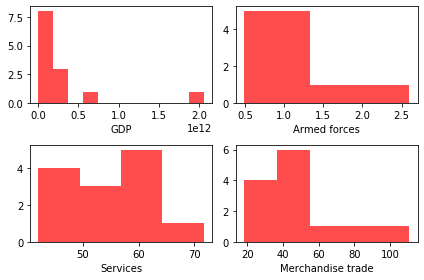

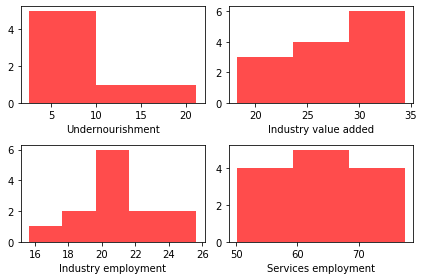

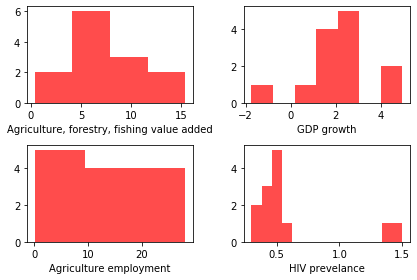

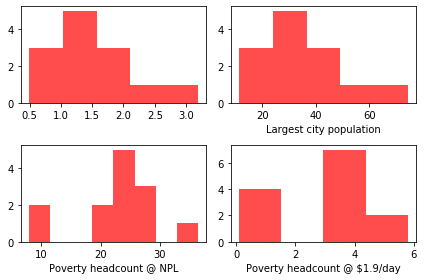

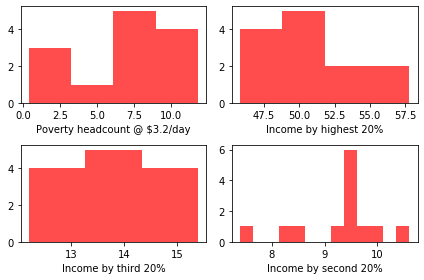

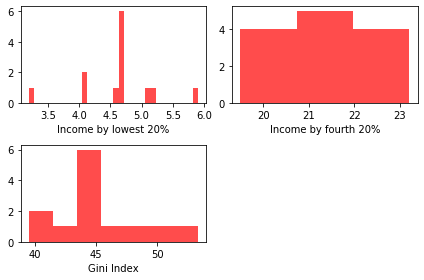

In [21]:
# AFTER IMPUTATION

# Plotting results using subplots of the columns with less than 6 missing values
 
plt.subplot(2, 2, 1) # Activating the top left plot
plt.hist(x     = 'gdp_(current_us$)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('GDP')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'armed_forces_personnel_(%_of_total_labor_force)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Armed forces')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'services,_value_added_(%_of_gdp)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Services')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'merchandise_trade_(%_of_gdp)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Merchandise trade')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'prevalence_of_undernourishment_(%_of_population)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Undernourishment')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'industry_(including_construction),_value_added_(%_of_gdp)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Industry value added')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Industry employment')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Services employment')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Agriculture, forestry, fishing value added')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'gdp_growth_(annual_%)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('GDP growth')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Agriculture employment')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'prevalence_of_hiv,_total_(%_of_population_ages_15-49)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('HIV prevelance')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'military_expenditure_(%_of_gdp)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.subplot(2, 2, 2) 
plt.hist(x     = 'population_in_the_largest_city_(%_of_urban_population)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Largest city population')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Poverty headcount @ NPL')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Poverty headcount @ $1.9/day')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Poverty headcount @ $3.2/day')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'income_share_held_by_highest_20%', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Income by highest 20%')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'income_share_held_by_third_20%', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Income by third 20%')

plt.subplot(2, 2, 4) 
plt.hist(x     = 'income_share_held_by_second_20%', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Income by second 20%')

plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1) 
plt.hist(x     = 'income_share_held_by_lowest_20%', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Income by lowest 20%')

plt.subplot(2, 2, 2) 
plt.hist(x     = 'income_share_held_by_fourth_20%', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red',
         alpha = 0.7)

plt.xlabel('Income by fourth 20%')

plt.subplot(2, 2, 3) 
plt.hist(x     = 'gini_index_(world_bank_estimate)', 
         data  = world_ironhide,
         bins  = 'fd',
         color = 'red', 
         alpha = 0.7)

plt.xlabel('Gini Index')

# saving the results to the working directory with savefig()
plt.savefig('Histograms AFTER Imputation.png')

plt.tight_layout()

plt.show()

### Imputing missing values with the data obtained from <a href="https://data.worldbank.org/">https://data.worldbank.org/</a><br><br>
SInce the plot designs showed major difference before and after imputing with the mean and median for most columns, we referred to external sources and found credible values from <a href="https://data.worldbank.org/">https://data.worldbank.org/</a>. The data gathered is from the year 2016.<br><br>
Further researching into these countries,we found that <strong>many countries had stopped reporting values</strong> for certain variables and even though we found some data for these countries on World bank, <em>they were reported many years back, hence were not credible</em>. <strong>So we have imputed those specific values with zero and justified the reason through our research and presentation slides.</strong>

In [22]:
# Filling in the missing values for columns that had 6 and more values missing. Sourced from the World Bank data website.
world_ironhide['tax_revenue_(%_of_gdp)']                                                                                  = [10.955015, 16.965, 12.704739, 17.41872, 15.1946172, 0, 0, 0, 9.95347, 13.203502, 0, 19.7403451, 0]
world_ironhide['government_expenditure_on_education,_total_(%_of_government_expenditure)']                                = [13.37615, 16.8421, 16.14928, 21.15548, 15.1696901, 0, 12.59765, 18.71751, 18.15432, 18.2357998, 0, 14.35388, 0]
world_ironhide['literacy_rate,_youth_total_(%_of_people_ages_15-24)']                                                     = [99.50271, 99.39917, 99.11096, 99.00866, 98.66831, 0, 99.05711, 96.68967, 98.4506, 99.0574799, 98.64556, 98.9326019, 98.75951]
world_ironhide['literacy_rate,_adult_total_(%_of_people_ages_15_and_above)']                                              = [99.12501, 92.4508, 92.80844, 96.40228, 94.65385, 0, 94.35023, 85.63973, 94.65024, 94.1496124, 94.38327, 98.6157227, 97.12709]
world_ironhide['educational_attainment,_at_least_completed_lower_secondary,_population_25+,_total_(%)_(cumulative)']      = [54.7, 58.8, 58.203, 79.605, 52.709, 0, 51.864, 31.02, 47.796, 62.297, 61.804, 54.946, 74.43]
world_ironhide['educational_attainment,_at_least_completed_post-secondary,_population_25+,_total_(%)_(cumulative)']       = [19.4, 24, 15.354, 22, 20.136, 0, 13.483, 2.269, 14.045, 20.877, 3.9, 12.246, 35.403]
world_ironhide['educational_attainment,_at_least_completed_primary,_population_25+_years,_total_(%)_(cumulative)']        = [91.931, 58.578, 78.481, 87.537, 78.903, 0, 82.736, 0, 75.6, 81.948, 0, 89.87, 92.7]
world_ironhide['educational_attainment,_at_least_master\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)']        = [0, 1.724, 0.765, 1.515, 3.317, 0, 1.245, 0, 6.672, 11.9, 0, 1.72, 1.003]
world_ironhide['educational_attainment,_at_least_completed_short-cycle_tertiary,_population_25+,_total_(%)_(cumulative)'] = [19.4, 24, 15.345, 22.036, 20.136, 0, 0, 0, 14.045, 20.877, 0, 12.246, 34.29]
world_ironhide['educational_attainment,_at_least_completed_upper_secondary,_population_25+,_total_(%)_(cumulative)']      = [42.157, 42.631, 45.108, 59.231, 47.629, 0, 42.3, 31.2, 36.368, 58.039, 24.716, 30.01844, 61.925]
world_ironhide['educational_attainment,_at_least_bachelor\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)']      = [0, 19.631, 15.345, 14.644, 10.902, 0, 11.719, 0, 12.353, 0, 9.2, 10.464, 25.146]
world_ironhide['births_attended_by_skilled_health_staff_(%_of_total)']                                                    = [100, 90, 99, 100, 99, 0, 97, 86, 96, 92, 80, 100, 96]
world_ironhide['prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)']                                       = [2.3, 3.4, 2.2, 0.5, 3.4, 0, 5.1, 8.5, 1.3, 3.1, 5.8, 4, 2.9]
world_ironhide['educational_attainment,_doctoral_or_equivalent,_population_25+,_total_(%)_(cumulative)']                  = [0, 0.2, 0.204, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.1, 0]
world_ironhide['gdp_(current_us$)']                                                                                       = [6.42696E+11, 37508642258, 2.05359E+12, 2.77746E+11, 3.1179E+11, 3116610112, 1.04296E+11, 3555205811, 39008900332, 2.10702E+11, 3068766110, 56488991831, 0]
world_ironhide['armed_forces_personnel_(%_of_total_labor_force)']                                                         = [0.523695553, 1.364771256, 0.699665438, 1.324247404, 1.837560282, 0, 0.492884965, 0.944578435, 0.79330148, 0.885899458, 0.935086308, 1.258641, 2.60212309]
world_ironhide['merchandise_trade_(%_of_gdp)']                                                                            = [19.53521205, 45.72279605, 18.27862869, 48.3505716, 26.92742992, 62.728411, 37.52018465, 86.29598856, 52.68797589, 40.41673903, 110.728543, 28.93661131, 0]
world_ironhide['prevalence_of_undernourishment_(%_of_population)']                                                        = [4.6, 17.1, 2.5, 2.7, 4.8, 0, 7.9, 8.1, 10.7, 9.7, 8.5, 2.5, 21.2]
world_ironhide['industry_(including_construction),_value_added_(%_of_gdp)']                                               = [21.8690651, 26.36997525, 18.35323112, 29.60421878, 26.81391098, 18.23908339, 32.52358756, 31.88122318, 34.38338067, 31.18609333, 32.26129341, 24.75231429, 0]
world_ironhide['employment_in_industry_(%_of_total_employment)_(modeled_ilo_estimate)']                                   = [22.43600082, 21.62999916, 20.46100044, 22.74099922, 19.41600037, 0, 18.5529995, 25.63599968, 20.09300041, 15.65400028, 24.64800072, 19.73500061, 21.14999962]
world_ironhide['employment_in_services_(%_of_total_employment)_(modeled_ilo_estimate)']                                   = [77.5039978, 50.18299866, 70.03700256, 68.00700378, 64.05000305, 0, 53.75400162, 55.68399811, 59.72900009, 56.65299988, 68.22100067, 71.51899719, 71.63500214]
world_ironhide['agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)']                                              = [5.478382229, 11.58933645, 4.634705691, 3.874238613, 6.387892118, 0.379562948, 9.329258912, 15.43635497, 10.28106015, 6.744032709, 12.56854382, 5.108838079, 0]
world_ironhide['gdp_growth_(annual_%)']                                                                                   = [2.668590379, 4.195209367, 1.063861259, 1.279183341, 1.351326676, -1.739764784, 2.368386526, 2.080177394, 4.958051422, 2.519088535, 1.687083602, 2.591338687, -3.894]
world_ironhide['employment_in_agriculture_(%_of_total_employment)_(modeled_ilo_estimate)']                                = [0.059, 28.18600082, 9.501999855, 9.251999855, 16.5340004, 0, 27.69400024, 18.68000031, 20.1779995, 27.69300079, 7.131999969, 8.74600029, 7.215000153]
world_ironhide['prevalence_of_hiv,_total_(%_of_population_ages_15-49)']                                                   = [0.4, 0.3, 0.5, 0.5, 0.4, 0, 0.4, 1.5, 0.5, 0.3, 1.4, 0.6, 0]
world_ironhide['military_expenditure_(%_of_gdp)']                                                                         = [0.856137916, 1.542397438, 1.419526638, 1.935612733, 3.186272628, 0, 2.361263384, 1.679493495, 0.893948254, 1.242135301, 0, 1.978552386, 0.487844145]
world_ironhide['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)']                                     = [25.7, 36.4, 26.5, 8.6, 26.9,0, 21.5, 0, 26.4, 21.7, 0, 7.9, 33.1]
world_ironhide['poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)']                                     = [0.5, 5.8, 4.8, 0.7, 3.9, 0, 3.2, 0, 1.2, 3.4, 0, 0.1, 0]
world_ironhide['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)']                                     = [2.4, 11.8, 9.6, 1.8, 10.8, 0, 8.7, 0, 5.6, 9.8, 0, 0.4, 0]
world_ironhide['income_share_held_by_highest_20%']                                                                        = [46.4, 48.5, 57.8, 52.9, 54.8, 0, 50.1, 0, 54, 48.4, 0, 45.8, 0]
world_ironhide['income_share_held_by_third_20%']                                                                          = [15.4, 15.0, 12.2, 13.2, 12.8, 0, 14.3, 0, 12.9, 14.9, 0, 15.4, 0]
world_ironhide['income_share_held_by_second_20%']                                                                         = [10, 9.5, 7.4, 9.2, 8.3, 0, 9.4, 0, 8.6, 9.7, 0, 10.6, 0]
world_ironhide['income_share_held_by_lowest_20%']                                                                         = [5.1, 4.1, 3.2, 5.2, 4.1, 0, 4.7, 0, 4.6, 4.7, 0, 5.9, 0]
world_ironhide['income_share_held_by_fourth_20%']                                                                         = [23.2, 22.8, 19.5, 19.5, 20.1, 0, 21.5, 21.5, 19.8, 22.2, 19.5, 22.3, 23.3]
world_ironhide['gini_index_(world_bank_estimate)']                                                                        = [41.2, 44, 53.3, 46.6, 49.7, 0, 44.7, 0, 48.8, 43.3, 0, 39.5, 0]

world_ironhide
                

,country_code,country_name,hult_region,cool_name,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)",...,m_military_expenditure_(%_of_gdp),m_population_in_the_largest_city_(%_of_urban_population),m_poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"m_prevalence_of_hiv,_total_(%_of_population_ages_15-49)",m_prevalence_of_undernourishment_(%_of_population),"m_prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)","m_services,_value_added_(%_of_gdp)",m_tax_revenue_(%_of_gdp)
0,ARG,Argentina,South America,Ironhide,100.000000,100.000000,100.000000,62.782,56.046355,17.149038,...,0,0,0,0,0,0,0,1,0,0
1,BOL,Bolivia,South America,Ironhide,91.800000,74.820442,99.400000,64.900,62.814740,11.471730,...,0,0,0,0,0,0,0,1,0,1
2,BRA,Brazil,South America,Ironhide,100.000000,100.000000,100.000000,59.111,43.450061,12.344584,...,0,0,0,0,0,0,0,1,0,0
3,CHL,Chile,South America,Ironhide,100.000000,100.000000,100.000000,41.052,45.382839,16.271094,...,0,0,0,0,0,0,0,1,0,0
4,COL,Colombia,South America,Ironhide,99.595238,97.930028,100.000000,66.651,46.533031,12.014374,...,0,0,0,0,0,0,0,1,0,0
5,CUW,Curacao,South America,Ironhide,100.000000,100.000000,100.000000,27.942,55.024535,25.136707,...,1,1,1,1,1,1,1,1,0,1
6,ECU,Ecuador,South America,Ironhide,100.000000,100.000000,100.000000,79.261,54.589947,10.745764,...,0,0,0,0,0,0,0,1,0,1
7,GUY,Guyana,South America,Ironhide,90.864876,88.757962,96.697205,74.382,53.333004,9.517584,...,0,1,1,1,1,0,0,1,0,1
8,PRY,Paraguay,South America,Ironhide,99.300000,98.508010,99.800000,70.504,56.116710,9.743259,...,0,0,0,0,0,0,0,1,0,0
9,PER,Peru,South America,Ironhide,96.362991,83.675904,100.000000,56.882,51.914041,11.865706,...,0,0,0,0,0,0,0,1,0,0


In [23]:
world_ironhide.isnull().sum().sum()

0

In [24]:
world_ironhide.describe().round(2)

,access_to_electricity_(%_of_population),"access_to_electricity,_rural_(%_of_rural_population)","access_to_electricity,_urban_(%_of_urban_population)","adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",age_dependency_ratio_(%_of_working-age_population),"age_dependency_ratio,_old_(%_of_working-age_population)","age_dependency_ratio,_young_(%_of_working-age_population)","agriculture,_forestry,_and_fishing,_value_added_(%_of_gdp)",armed_forces_personnel_(%_of_total_labor_force),"birth_rate,_crude_(per_1,000_people)",...,m_military_expenditure_(%_of_gdp),m_population_in_the_largest_city_(%_of_urban_population),m_poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population),m_poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),"m_prevalence_of_hiv,_total_(%_of_population_ages_15-49)",m_prevalence_of_undernourishment_(%_of_population),"m_prevalence_of_underweight,_weight_for_age_(%_of_children_under_5)","m_services,_value_added_(%_of_gdp)",m_tax_revenue_(%_of_gdp)
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,...,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.0,13.00,13.00
mean,98.05,94.97,99.67,62.25,52.76,13.85,38.91,7.06,1.05,17.00,...,0.15,0.23,0.31,0.31,0.31,0.15,0.08,1.0,0.08,0.46
std,3.24,8.10,0.91,15.12,5.15,5.06,6.99,4.60,0.66,3.63,...,0.38,0.44,0.48,0.48,0.48,0.38,0.28,0.0,0.28,0.52
min,90.86,74.82,96.70,27.94,43.45,9.52,29.11,0.00,0.00,9.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00
25%,96.78,90.97,99.80,58.73,51.91,10.67,32.20,4.63,0.70,14.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00
50%,100.00,100.00,100.00,62.78,53.64,11.87,40.05,6.39,0.94,18.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00
75%,100.00,100.00,100.00,70.50,55.02,16.27,43.82,10.28,1.32,19.97,...,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.0,0.00,1.00
max,100.00,100.00,100.00,85.34,62.81,25.14,51.34,15.44,2.60,22.08,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


## Detecting the outliers


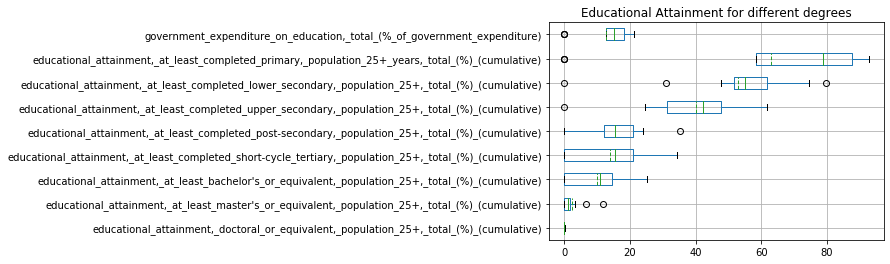

<Figure size 432x288 with 0 Axes>

In [25]:
world_ironhide.boxplot(column        = ['educational_attainment,_doctoral_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_master\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_bachelor\'s_or_equivalent,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_short-cycle_tertiary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_post-secondary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_upper_secondary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_lower_secondary,_population_25+,_total_(%)_(cumulative)', 'educational_attainment,_at_least_completed_primary,_population_25+_years,_total_(%)_(cumulative)', 'government_expenditure_on_education,_total_(%_of_government_expenditure)'],                 
                        vert         = False,
                        manage_ticks = True,
                        patch_artist = False, 
                        meanline     = True,
                        showmeans    = True)

plt.title('Educational Attainment for different degrees')

plt.show()

plt.savefig('Boxplots for educational attainment.jpg')

In [ ]:
world_ironhide.boxplot(column       = ['income_share_held_by_lowest_20%', 'income_share_held_by_second_20%', 'income_share_held_by_third_20%', 'income_share_held_by_fourth_20%', 'income_share_held_by_highest_20%'],
                       vert         = False,
                       manage_ticks = True,
                       patch_artist = False, 
                       meanline     = True,
                       showmeans    = True)

plt.title('Income share')

plt.show()

In [ ]:
world_ironhide.boxplot(column       = ['poverty_headcount_ratio_at_$3.20_a_day_(2011_ppp)_(%_of_population)', 'poverty_headcount_ratio_at_$1.90_a_day_(2011_ppp)_(%_of_population)', 'poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'],
                       vert         = False,
                       manage_ticks = True,
                       patch_artist = False, 
                       meanline     = True,
                       showmeans    = True)

plt.title('Poverty headcounts')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'armed_forces_personnel_(%_of_total_labor_force)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('Armed Forces')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'gdp_growth_(annual_%)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('GDP growth')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'prevalence_of_undernourishment_(%_of_population)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('Undernourishment')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'population_growth_(annual_%)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('Population growth')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'population_in_the_largest_city_(%_of_urban_population)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('Population in the largest city')

plt.show()

In [ ]:
world_ironhide.boxplot(column    = 'access_to_electricity_(%_of_population)', 
                       vert      = False,
                       meanline  = True,
                       showmeans = True)

plt.title('Access to Electricity')

plt.show()

## Creating plots to explain the data

In [ ]:
sns.barplot(data = world_ironhide, 
            y = 'gdp_growth_(annual_%)',
            x = 'country_name')

plt.xticks(rotation = 90)

In [ ]:
sns.barplot(data = world_ironhide,
            x = 'country_name',
            y = 'population_ages_65_and_above_(%_of_total_population)')

plt.xticks(rotation = 90)

In [ ]:
plt.scatter(x = 'population_density_(people_per_sq._km_of_land_area)',
            y = 'population_growth_(annual_%)',
            data = world_ironhide)

plt.title('Population density Vs. Population growth')

plt.xlabel('Population density')
plt.ylabel('Population Growth')

plt.show()

In [ ]:
sns.barplot(data = world_ironhide,
            x = 'country_name',
            y = 'adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)')

plt.xticks(rotation = 90)

In [ ]:
# Creating a correlation matrix
world_ironhide_correlation = world_ironhide.corr().round(2)

print(world_ironhide_correlation)

# Exprting to excel
world_ironhide_correlation.to_excel('world_ironhide_correlation_matrix.xlsx')

In [ ]:
sns.palplot(sns.color_palette('inferno', 12))

# Defining the plot size
fig, ax = plt.subplots(figsize = (50, 50))

# Creating a heat map
sns.heatmap(world_ironhide_correlation,
            cmap       = 'inferno',
            square     = False,
            annot      = True,
            linecolor  = 'black',
            linewidths = 0.3,
            cbar       = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom     += 0.5            # add 0.5 to the bottom
top        -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# Saving the plot as .png
plt.savefig('world_ironhide_correlation_heatmap.png')

# Display the plot
plt.show()


_________          _______  _        _                   _______          
\__   __/|\     /|(  ___  )( (    /|| \    /\  |\     /|(  ___  )|\     /|
   ) (   | )   ( || (   ) ||  \  ( ||  \  / /  ( \   / )| (   ) || )   ( |
   | |   | (___) || (___) ||   \ | ||  (_/ /    \ (_) / | |   | || |   | |
   | |   |  ___  ||  ___  || (\ \) ||   _ (      \   /  | |   | || |   | |
   | |   | (   ) || (   ) || | \   ||  ( \ \      ) (   | |   | || |   | |
   | |   | )   ( || )   ( || )  \  ||  /  \ \     | |   | (___) || (___) |
   )_(   |/     \||/     \||/    )_)|_/    \/     \_/   (_______)(_______)
                                                                          
